
# Classification Problem

## Problem Statement



In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
#import hvplot.pandas
%matplotlib inline

In [10]:
def plot_gdp(data, col=None):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Use seaborn's heatmap function
    sns.heatmap(data=data[[col[0]]], annot=data[[col[1]]], fmt='', cmap='YlGnBu')

    # Add labels and title
    plt.xlabel('GDP per capita')
    plt.title('Countries by GDP per capita')

    # Show the plot
    plt.show()

def scale_data(data, col):
    Sum_data = sum(data[col])
    return list(map(lambda i: i/Sum_data, data[col]))

def gdp_imp_exp(data):
    countries = data.country.values.tolist()

    gdpp = scale_data(data, 'gdpp')

    exports = scale_data(data, 'exports')

    imports = scale_data(data, 'imports')

    # Set the width of the bars
    bar_width = 0.25

    # Create the positions for the bars
    bar_positions = np.arange(len(countries))

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bars for GDP
    ax.bar(bar_positions - bar_width, gdpp, width=bar_width, label='gdpp')

    # Plot the bars for exports
    ax.bar(bar_positions, exports, width=bar_width, label='exports')

    # Plot the bars for imports
    ax.bar(bar_positions + bar_width, imports, width=bar_width, label='imports')

    # Add labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel('Amount')
    ax.set_title('GDP, Exports, and Imports by Country')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(countries, rotation=45)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

def income_cat(income):
    if income < 1035:
        return "low income"
    elif income > 1036 and income < 4085:
        return "low-midle"
    elif income > 4086 and income < 12615:
        return "upper middle income"
    else:
        return "high income"
    
def pivot(data, col):
    tb1 = data.pivot_table(index = 'country',values = col,columns = 'income-class',
                            aggfunc='mean',margins =True,margins_name ='Average')

    return tb1.sort_values('Average', ascending=False)

In [11]:
df = pd.read_csv('data/Country-data.csv', index_col=0)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
df.shape

(167, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [14]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


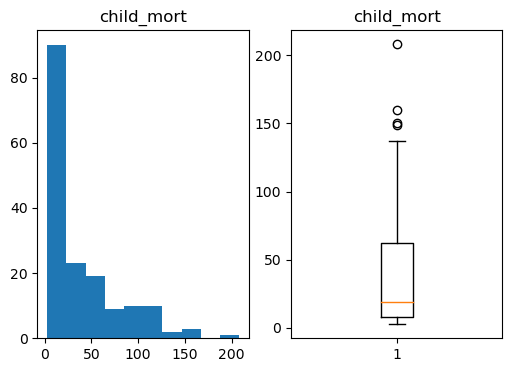

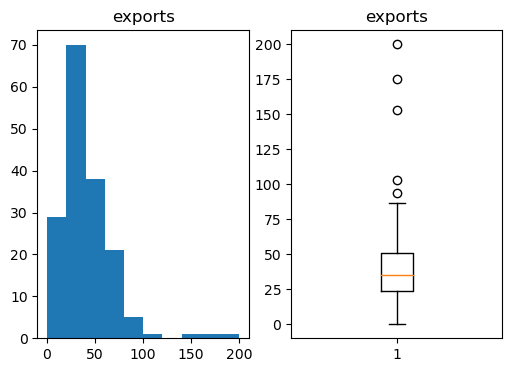

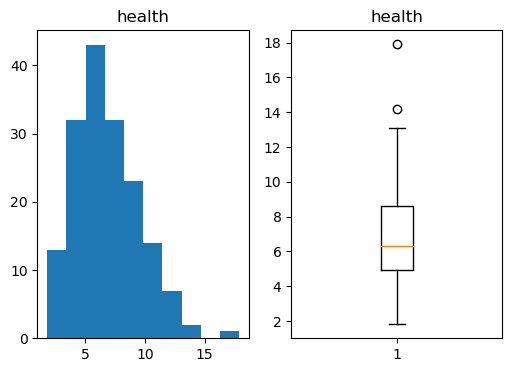

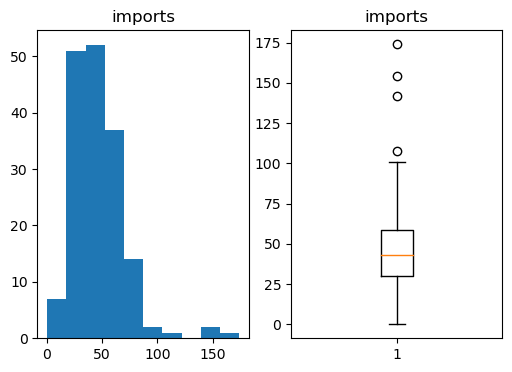

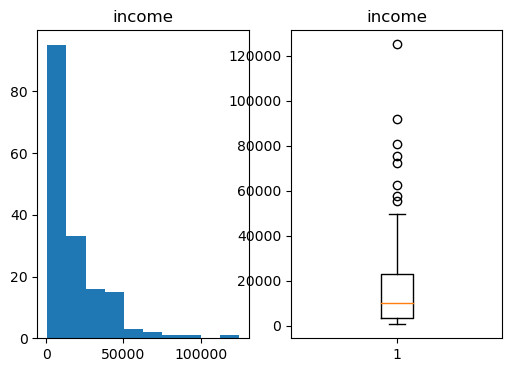

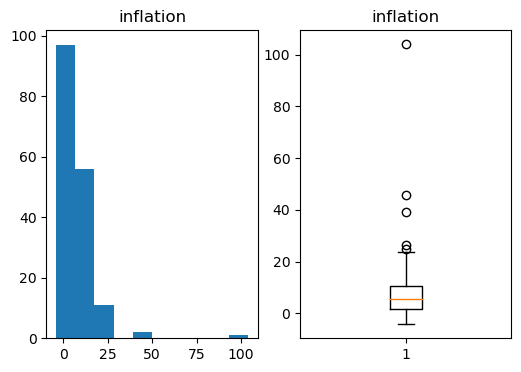

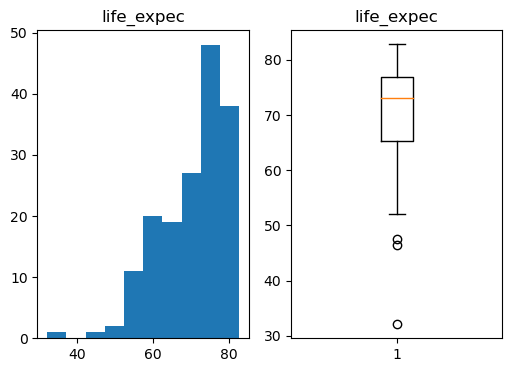

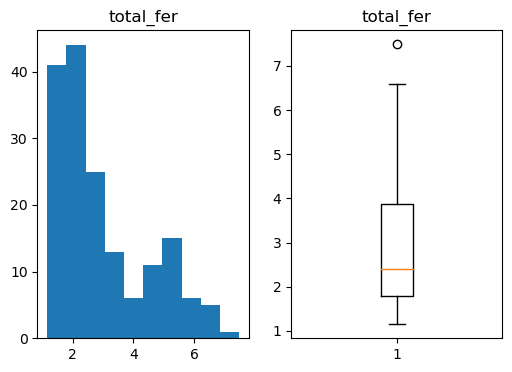

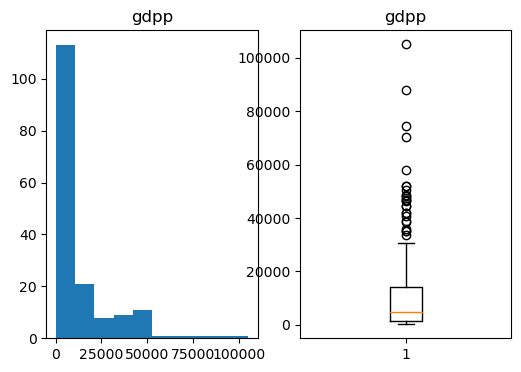

In [15]:
for i in df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(6, 4))
    # Plot histogram
    axs[0].hist(df[i])
    axs[0].set_title(f'{i}')

    # Plot boxplot
    axs[1].boxplot(df[i])
    axs[1].set_title(f'{i}')

    plt.show()

    print()

    Features with Outliers:
        child_mort: The maximum value (208) is significantly higher than the 75th percentile (62.1), suggesting the presence of outliers.
        exports: The maximum value (200) is considerably higher than the 75th percentile (51.35), indicating the presence of outliers.
        health: No clear evidence of outliers based on the summary statistics.
        imports: The maximum value (174) is higher than the 75th percentile (58.75), indicating the presence of outliers.
        income: The maximum value (125,000) is much higher than the 75th percentile (22,800), suggesting the presence of outliers.
        inflation: The maximum value (104) is considerably higher than the 75th percentile (10.75), indicating the presence of outliers.
        life_expec: No clear evidence of outliers based on the summary statistics.
        total_fer: No clear evidence of outliers based on the summary statistics.
        gdpp: The maximum value (105,000) is much higher than the 75th percentile (14,050), suggesting the presence of outliers.

    Features with Skewness:
        child_mort: The mean (38.27) is closer to the median (19.3), suggesting a mild right-skewness.
        exports: No clear evidence of skewness based on the summary statistics.
        health: No clear evidence of skewness based on the summary statistics.
        imports: No clear evidence of skewness based on the summary statistics.
        income: The mean (17,144.69) is higher than the median (9,960), indicating a possible right-skewness.
        inflation: The mean (7.78) is higher than the median (5.39), suggesting a mild right-skewness.
        life_expec: No clear evidence of skewness based on the summary statistics.
        total_fer: No clear evidence of skewness based on the summary statistics.
        gdpp: The mean (12,964.16) is higher than the median (4,660), indicating a possible right-skewness.

Based on this analysis, the features that have outliers are: child_mort, exports, imports, income, inflation, and gdpp. The features that have mild right-skewness are: child_mort, income, inflation, and gdpp.

## Correlation


In [16]:
from pandas.core.describe import DataFrameDescriber
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix['gdpp'].sort_values(ascending=False)

gdpp          1.000000
income        0.895571
life_expec    0.600089
exports       0.418725
health        0.345966
imports       0.115498
inflation    -0.221631
total_fer    -0.454910
child_mort   -0.483032
Name: gdpp, dtype: float64

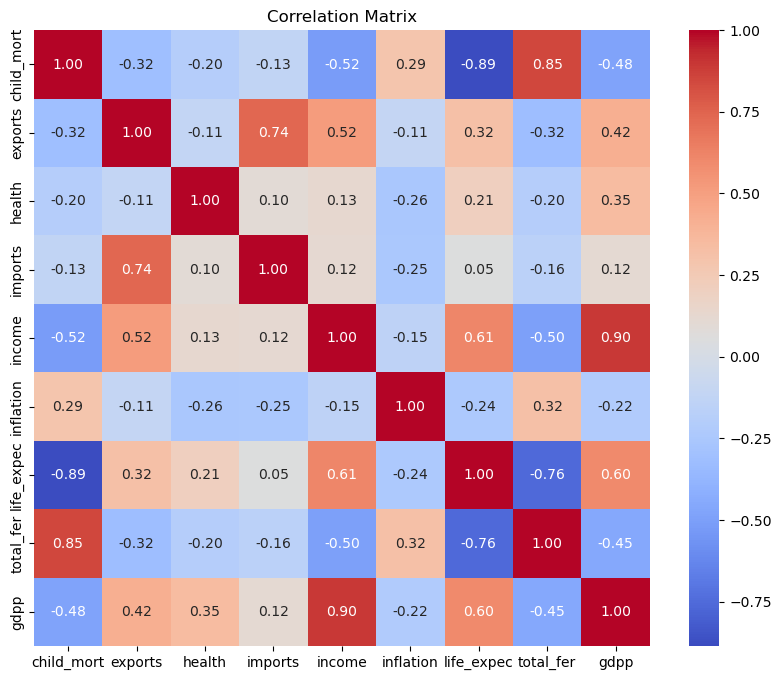

In [17]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8),facecolor='w')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Based on these correlations, it appears that gdpp (Gross Domestic Product per capita) is strongly positively correlated with income and moderately positively correlated with life_expec and exports. On the other hand, gdpp has moderate negative correlations with total_fer and child_mort, suggesting that as gdpp increases, the fertility rate and child mortality tend to decrease.



In [18]:
df1 = df.copy()

In [19]:
df1 = df1.reset_index()

In [20]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


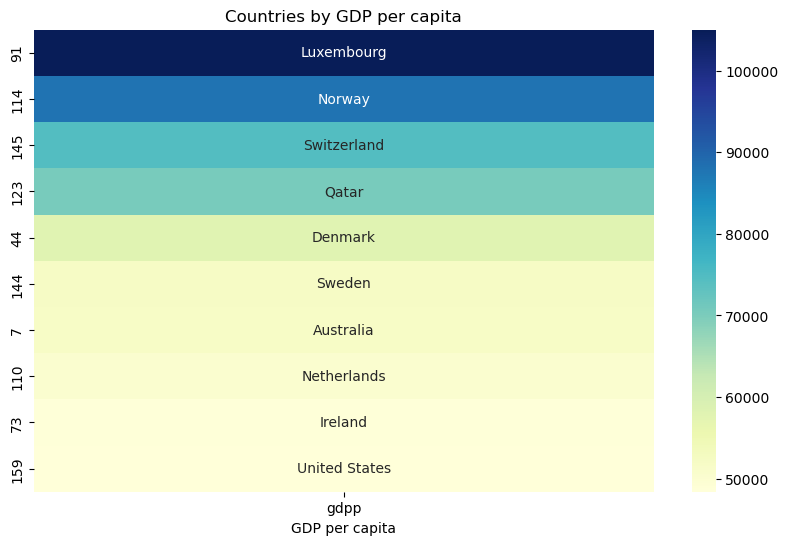

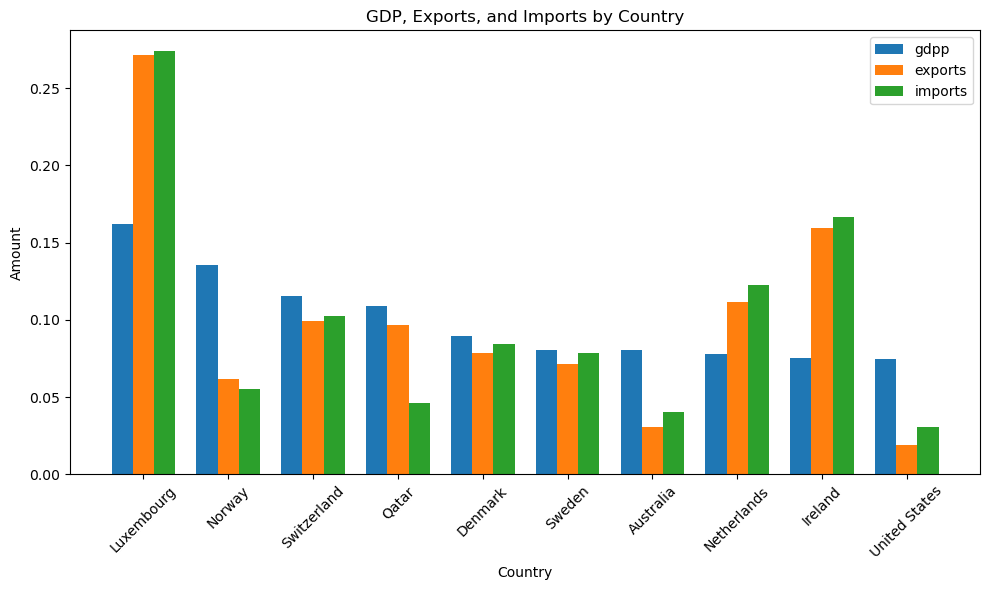

In [21]:
top10 = df1.sort_values(by='gdpp', ascending=False)[0:10]

plot_gdp(top10, ['gdpp', 'country'])

gdp_imp_exp(top10)

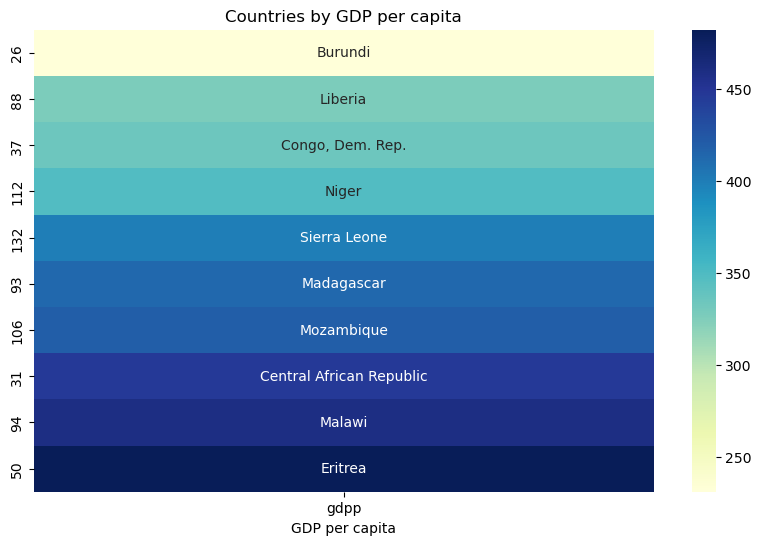

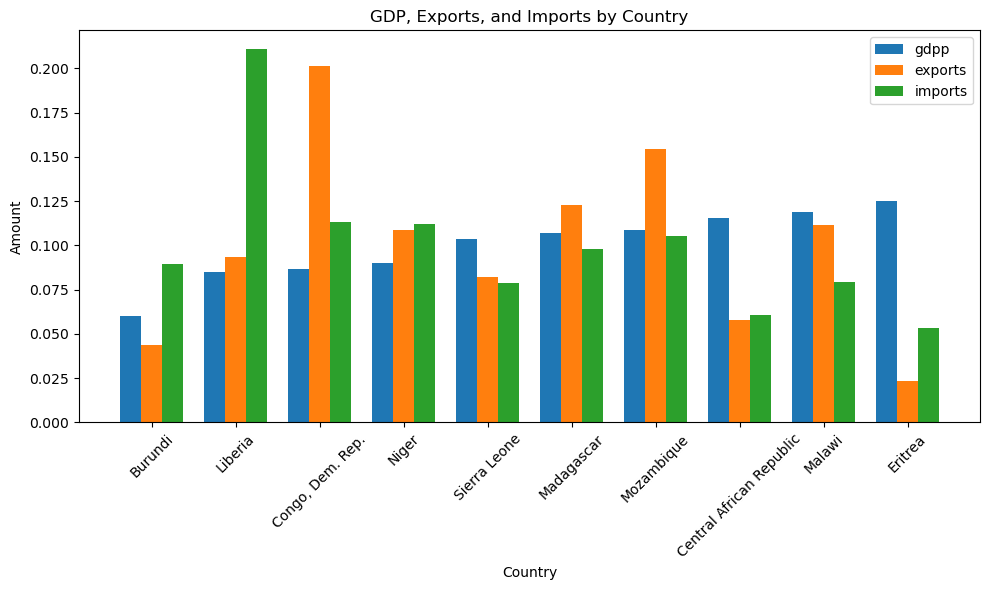

In [22]:
last10 = df1.sort_values(by='gdpp', ascending=True)[0:10]

plot_gdp(last10, ['gdpp', 'country'])

gdp_imp_exp(last10)

# Countries by income level and GDP:

Countries are categorized into different income groups based on their Gross National Income (GNI) per capita, as defined by the World Bank. These income groups include high-income, upper middle-income, lower middle-income, and low-income countries. The specific threshold levels for each group are as follows (us dollar).
- Low-Income Countries: GNI per capita less than 1,035
- Lower Middle-Income Countries: GNI per capita between 1,036 and 4,085
- Upper Middle-Income Countries: GNI per capita between 4,086 and 12,615
- High-Income Countries: GNI per capita more than 12,615

The GNI per capita values are estimated in dollar terms using the World Bank Atlas method, and the data used for this classification is from the year 2012. This classification system ensures compatibility with similar income groupings used elsewhere. 

(UN/DESA. (2014). Country Classification–Data Sources, Country Classifications and Aggregation Methodology.)


In [23]:
df2 = df1.copy()
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
df2.insert(6, "income-class", df2['gdpp'].apply(lambda x: income_cat(x)))

In [25]:
df2.head()

,country,child_mort,exports,health,imports,income,income-class,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,low income,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,upper middle income,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,upper middle income,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,low-midle,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,upper middle income,1.44,76.8,2.13,12200


In [26]:
df2['income-class'].unique()

array(['low income', 'upper middle income', 'low-midle', 'high income'],
      dtype=object)

In [27]:
## Average Sales and profit of product category made in each market
piv = df2[['country','gdpp','income-class']]

for income_level in df2['income-class'].unique():
    income_cat = pivot(piv, 'gdpp')
    print('---------------------------------------')
    print(income_level)
    print('---------------------------------------')
    print(income_cat[~income_cat[income_level].isna()][[income_level]][0:10])
    print("=======================================")
    print()

---------------------------------------
low income
---------------------------------------
income-class     low income
country                    
Average            612.3125
Senegal           1000.0000
Myanmar            988.0000
Kenya              967.0000
Chad               897.0000
Kyrgyz Republic    880.0000
Cambodia           786.0000
Comoros            769.0000
Benin              758.0000
Bangladesh         758.0000

---------------------------------------
upper middle income
---------------------------------------
income-class         upper middle income
country                                 
Average                      7447.446809
Poland                      12600.000000
Antigua and Barbuda         12200.000000
Libya                       12100.000000
Lithuania                   12000.000000
Uruguay                     11900.000000
Latvia                      11300.000000
Brazil                      11200.000000
Seychelles                  10800.000000
Turkey               

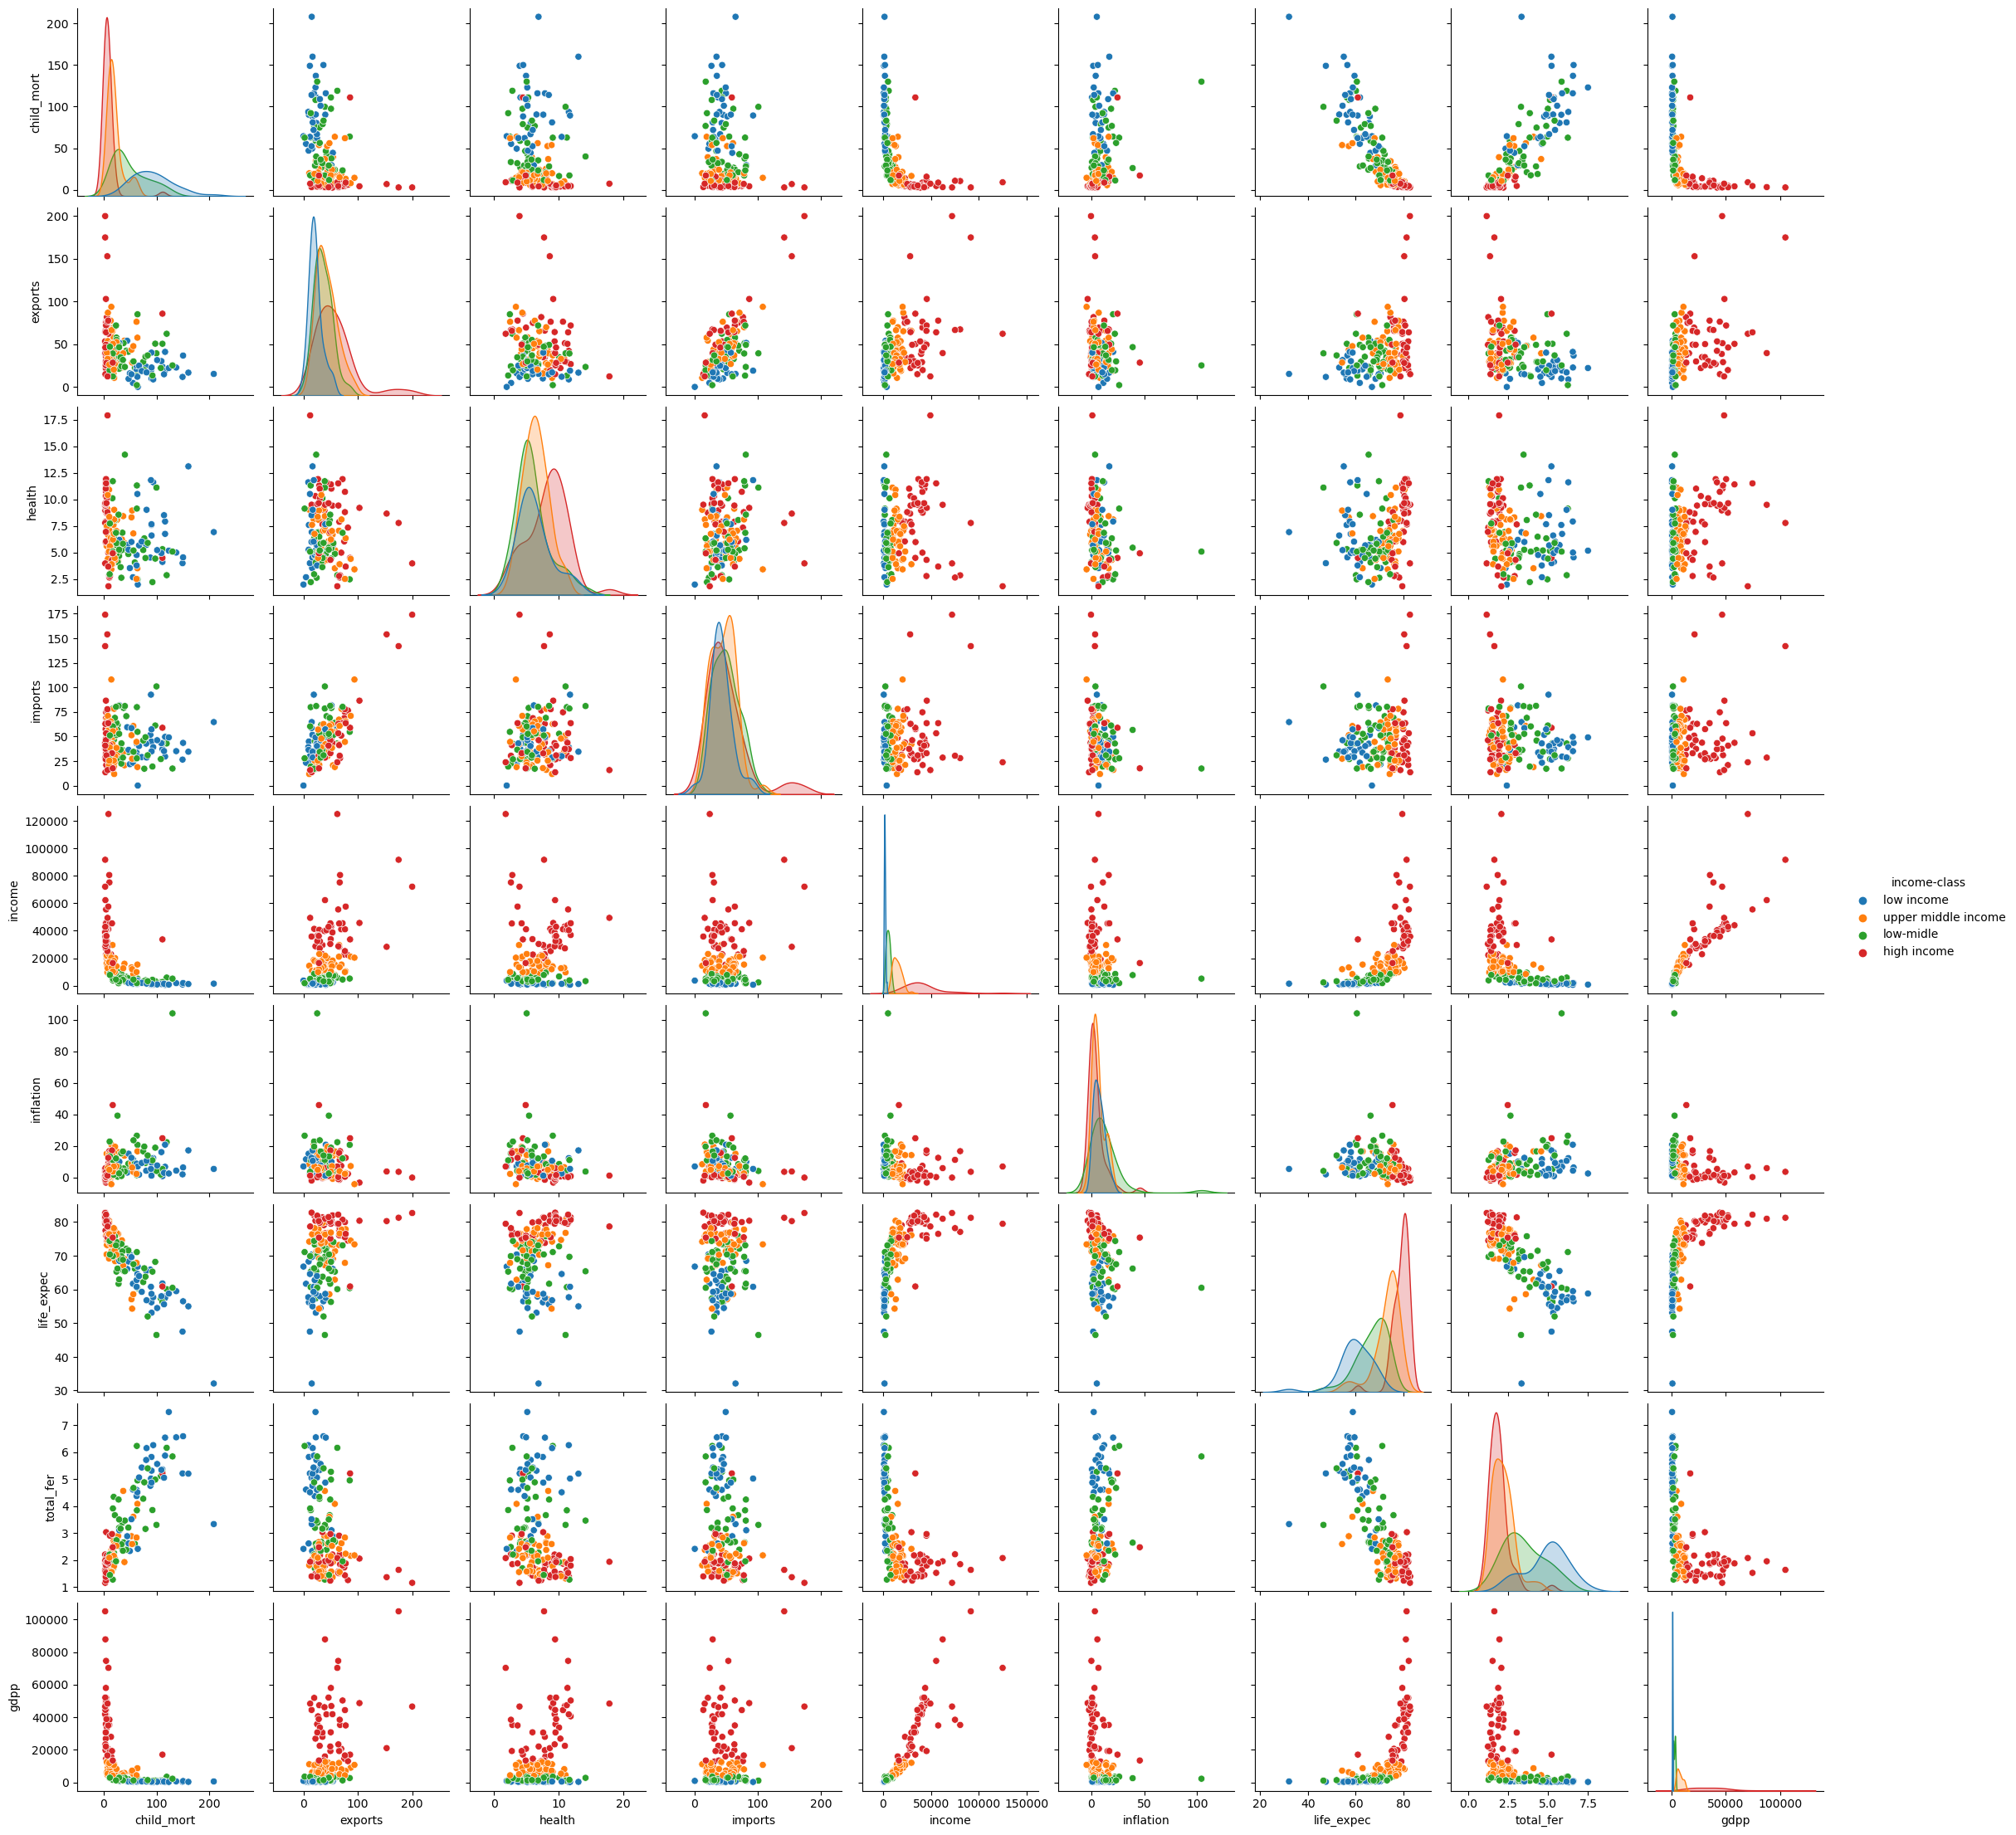

In [28]:
sns.pairplot(df2, hue='income-class')

In [29]:
target_lab = {i: n for n, i in enumerate(df2['income-class'].unique())}

In [30]:
target_lab

{'low income': 0, 'upper middle income': 1, 'low-midle': 2, 'high income': 3}

In [31]:
final_data = df2.copy()

In [32]:
final_data['income-class'].replace(target_lab, inplace=True)

In [33]:
final_data.head()

,country,child_mort,exports,health,imports,income,income-class,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,1,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,1,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,2,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1,1.44,76.8,2.13,12200


In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       167 non-null    object 
 1   child_mort    167 non-null    float64
 2   exports       167 non-null    float64
 3   health        167 non-null    float64
 4   imports       167 non-null    float64
 5   income        167 non-null    int64  
 6   income-class  167 non-null    int64  
 7   inflation     167 non-null    float64
 8   life_expec    167 non-null    float64
 9   total_fer     167 non-null    float64
 10  gdpp          167 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 14.5+ KB


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [36]:
final_data.isnull().sum()



country         0
child_mort      0
exports         0
health          0
imports         0
income          0
income-class    0
inflation       0
life_expec      0
total_fer       0
gdpp            0
dtype: int64

In [37]:
final_data.head()

,country,child_mort,exports,health,imports,income,income-class,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,1,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,1,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,2,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1,1.44,76.8,2.13,12200


In [38]:
df2[['income-class', 'country', "income"]].groupby(["income-class","country"]).mean()

income
income-class        country              
high income         Australia     41400.0
                    Austria       43200.0
                    Bahamas       22900.0
                    Bahrain       41100.0
                    Barbados      15300.0
...                                   ...
upper middle income Thailand      13500.0
                    Tunisia       10400.0
                    Turkey        18000.0
                    Turkmenistan   9940.0
                    Uruguay       17100.0

[167 rows x 1 columns]

In [39]:
df2[df2['country'] == 'Algeria']

,country,child_mort,exports,health,imports,income,income-class,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,upper middle income,16.1,76.5,2.89,4460


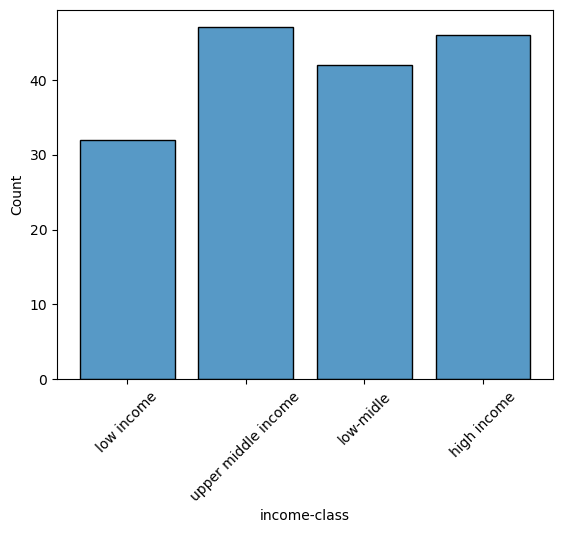

In [40]:
sns.histplot(df2['income-class'], shrink=.8)
plt.xlabel("income-class")
plt.xticks(rotation=45)

plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc,
    roc_auc_score)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (
    train_test_split,
    cross_val_score, 
    KFold,
    cross_val_predict)
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


In [42]:
# Split the data into features and target
X = final_data.drop(['country', 'income-class'], axis=1)
y = final_data['income-class']

X.shape, y.shape

((167, 9), (167,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# Perform imputation to handle missing values in X and y

In [44]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
#Create predictions from the test set and create a classification report and a confusion matrix.
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

[[ 6  0  0  0]
 [ 0 10  0  0]
 [ 0  0  9  0]
 [ 0  0  0  9]]


In [46]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
predictions = rfc.predict(X_test)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.91      1.00      0.95        10
           2       0.89      0.89      0.89         9
           3       1.00      1.00      1.00         9

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.94      0.94      0.94        34



In [49]:
print(confusion_matrix(y_test,predictions))

[[ 5  0  1  0]
 [ 0 10  0  0]
 [ 0  1  8  0]
 [ 0  0  0  9]]


In [50]:
def std_data(data):
    return MinMaxScaler().fit_transform(data)

def train_model(model, param_grid, data):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(data[0], data[2])

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(data[1])

    print("Best Parameters:", best_params)
    print()
    
    labels = ['low income', 'upper middle income', 'low-midle', 'high income']

    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame for the confusion matrix with custom labels
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    print("Confusion Matrix:")
    print(cm_df)

#     Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    
    print("Classification Report:")
    print(classification_report(data[3], y_pred))
    print("Accuracy:", accuracy_score(data[3], y_pred))
    
    print("\n\n")
    
    return best_model
        
def plot_roc_svc(model, data, labels):
    # Convert the numeric labels in y_test to categorical labels
    categorical_labels = [labels[int(label)] for label in data[3]]
    
    # Convert the multiclass labels to binary indicators
    binary_labels = np.zeros((len(data[3]), len(labels)))
    for i, label in enumerate(labels):
        binary_labels[:, i] = (np.array(categorical_labels) == label)
    
    decision_scores = model.decision_function(data[1])
    
    # Calculate the micro-averaged false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(binary_labels.ravel(), decision_scores.ravel())

    
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## SVC

Training SVC:


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Confusion Matrix:
                     low income  upper middle income  low-midle  high income
low income                    5                    0          1            0
upper middle income           0                   10          0            0
low-midle                     0                    1          8            0
high income                   0                    0          0            9


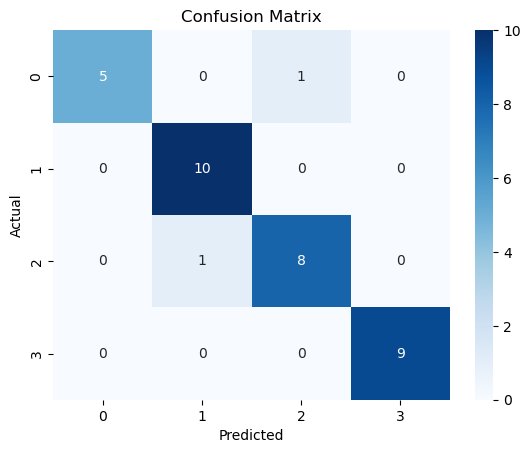

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.91      1.00      0.95        10
           2       0.89      0.89      0.89         9
           3       1.00      1.00      1.00         9

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.94      0.94      0.94        34

Accuracy: 0.9411764705882353





In [51]:
svc_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc = SVC(random_state=42)
data = [X_train, X_test, y_train, y_test]

# Train the classifiers
print("Training SVC:")
print("="*20)

svc_model = train_model(svc, svc_param, data)

The confusion matrix shows the predicted and actual classifications for each class based on your custom labels: 'low income', 'upper middle income', 'low-midle', and 'high income'.

Let's interpret the confusion matrix:

- For the 'low income' class:
        There were 5 instances where the true class was 'low income', and the model correctly predicted them as 'low income'.
        There was 1 instance where the true class was 'low income', but the model misclassified it as 'low-midle'. There were no misclassifications for 'low income' as 'upper middle income' or 'high income'.

- For the 'upper middle income' class:
        All instances (10 in total) where the true class was 'upper middle income' were correctly predicted as 'upper middle income'. There were no misclassifications for this class.

- For the 'low-midle' class:
        There was 1 instance where the true class was 'low-midle', and the model correctly predicted it as 'low-midle'.
        There were no instances of misclassification for 'low-midle' as any other class.

- For the 'high income' class:
        All instances (9 in total) where the true class was 'high income' were correctly predicted as 'high income'. There were no misclassifications for this class.

Overall, the model performed well in terms of accuracy for most of the classes. There was only one misclassification between 'low income' and 'low-midle'. However, for the other classes, the model achieved perfect accuracy, correctly predicting all instances.



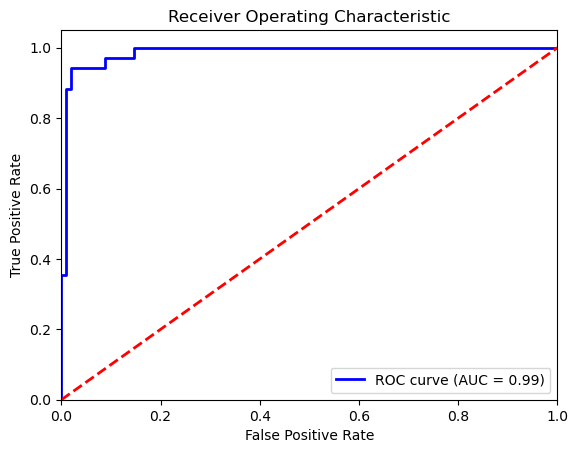

In [52]:
labels = ['low income', 'upper middle income', 'low-midle', 'high income']
plot_roc_svc(svc_model, data, labels)


A high ROC AUC score indicates that the model has a high true positive rate and a low false positive rate across different classification thresholds. This means that the model is effectively separating the classes and making accurate predictions.

In summary, a ROC AUC of 0.99 indicates that the model has achieved a very high level of performance and is capable of accurately distinguishing between the different income classes in the dataset.